In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df_cust = pd.read_csv('customer_demographics.csv')
df_cust.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [3]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.6+ KB


In [5]:
df_cust['age_range'].value_counts()

46-55    271
36-45    187
26-35    130
70+       68
56-70     59
18-25     45
Name: age_range, dtype: int64

In [6]:
df_cust['no_of_children'].fillna(0,inplace=True)

In [7]:
df_cust.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,0,4
1,6,46-55,Married,0,2,0,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,0,5


In [8]:
df_cust['income_bracket'].value_counts()

5     187
4     165
6      88
3      70
2      68
1      59
8      37
7      32
9      29
12     10
10     10
11      5
Name: income_bracket, dtype: int64

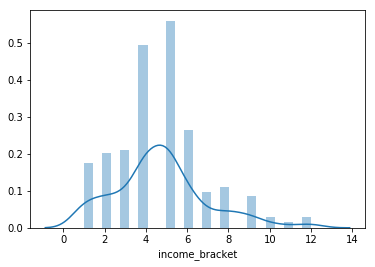

In [10]:
sns.distplot(df_cust['income_bracket'],bins=25)

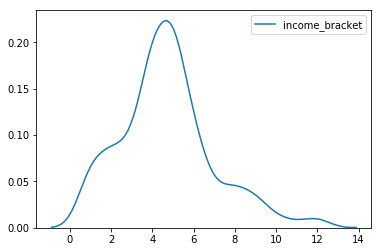

In [11]:
sns.kdeplot(df_cust['income_bracket'])

In [19]:
df_cust.dtypes

customer_id        int64
age_range         object
marital_status    object
rented             int64
family_size       object
no_of_children    object
income_bracket     int64
dtype: object

In [20]:
df_cust['no_of_children'] = pd.to_numeric(df_cust['no_of_children'],errors='coerce')
df_cust['no_of_children'] = df_cust['no_of_children'].replace(np.nan, 3, regex=True)
df_cust['no_of_children'] = df_cust['no_of_children'].astype(int)

In [21]:
df_cust['family_size'] = pd.to_numeric(df_cust['family_size'],errors='coerce')
df_cust['family_size'] = df_cust['family_size'].replace(np.nan, 5, regex=True)
df_cust['family_size'] = df_cust['family_size'].astype(int)
df_cust.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,0,4
1,6,46-55,Married,0,2,0,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,0,5


In [22]:
df_cust['marital_status'].replace(to_replace=['Single','Married'], value=[0,1],inplace=True)
df_cust.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,1.0,0,2,0,4
1,6,46-55,1.0,0,2,0,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,0.0,0,1,0,5


In [ ]:
def condition(df_cust):
    for i in range(760):
        if df_cust['marital_status'] == np.nan :
            
            if df_cust['family_size']-df_cust['no_of_childern'] == 1:
                df_cust['marital_status'] = 0
            else:
                df_cust['marital_status'] == 1
    
#df_cust.apply(condition(df_cust))

In [48]:

#for i in range(5):
    #if df_cust.loc[i]['marital_status'] :
#        print(df_cust.loc[i]['family_size'] - df_cust.loc[i]['no_of_children'])
            
            
#df_cust.head()

In [29]:
#df_cust.loc[3]['marital_status']df_cust.loc[i]['family_size'] = 0

3.0

In [50]:
df_cust['marital_status'] = df_cust.apply(lambda row: 1 if row['family_size']-row['no_of_children'] > 1 else 0,axis=1)

In [51]:
df_cust.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,1,0,2,0,4
1,6,46-55,1,0,2,0,5
2,7,26-35,1,0,3,1,3
3,8,26-35,1,0,4,2,6
4,10,46-55,0,0,1,0,5


In [53]:
df_cust.dtypes

customer_id        int64
age_range         object
marital_status     int64
rented             int64
family_size        int32
no_of_children     int32
income_bracket     int64
dtype: object